# Exercise - MNIST

1. Use the $\texttt{mnist}$ dataset (as just shown in the slides). Build a neural network using what we have explored so far and evaluate its performance on the test data.
1. Explore whether your neural network appears to be under- or overfitting by constructing plots of the train and test losses and accuracies during training. Use this information to improve your model - that is, train for longer if it appears to be underfitting and shorter if it appears to be overfitting. Does your test performance improve? What about your train performance?
1. (Bonus): Later during the semester, we will explore *convolutional neural networks*. For those of you finished with (1) and (2), you may try this now to improve your model; check https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D for details.

**See slides for more details!**

# Exercise 1

Use the $\texttt{mnist}$ dataset (as just shown in the slides). Build a neural network using what we have explored so far and evaluate its performance on the test data.

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale your features in some fashion (otherwise performance will likely suffer)
x_train = x_train/255 
x_test = x_test/255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
import numpy as np
print(f'max ={np.max(x_train)}')
print(f'min ={np.min(x_train)}')

max =1.0
min =0.0


Here is a model to get you started.

Take note of the "Flatten" layer. This is important to reshape your data from (28, 28) to (784,).

Alternatively, you could reshape your data (the x's). This can be done using:

$\texttt{x = x.reshape(n, 784)}$ 

where $n$ is the number of samples (60k for training, 10k for test).

Then you don't need the Flatten layer, but remember to still specify an input shape of your first layer (i.e. 784 if you have done this reshaping).

**Note**: Do feel free to experiment with the number of layers, nodes per layer, and optimizer.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model_fit = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=60)

Epoch 1/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2228 - accuracy: 0.9362 - val_loss: 0.1189 - val_accuracy: 0.9629
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0919 - accuracy: 0.9724 - val_loss: 0.0861 - val_accuracy: 0.9726
Epoch 3/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 0.0743 - val_accuracy: 0.9771
Epoch 4/60
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0660 - val_accuracy: 0.9802
Epoch 5/60
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0689 - val_accuracy: 0.9793
Epoch 6/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0737 - val_accuracy: 0.9789
Epoch 7/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0788 - val_accuracy:

In [5]:
model_eval = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1981 - accuracy: 0.9804


Here is a small function you can use as a starting point for your network - but feel free to experiment!

# Exercise 2

Explore whether your neural network appears to be under- or overfitting by constructing plots of the train and test losses and accuracies during training. Use this information to improve your model - that is, train for longer if it appears to be underfitting and shorter if it appears to be overfitting. Does your test performance improve? What about your train performance?

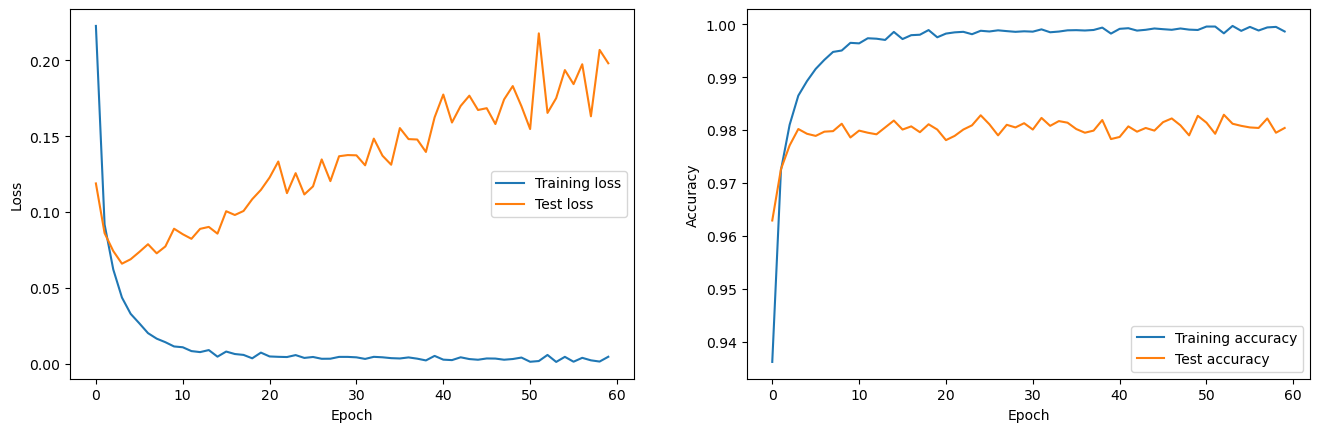

In [6]:
# See slides for "hints"
from matplotlib import pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(model_fit.history['loss'], label='Training loss')
ax.plot(model_fit.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(model_fit.history['accuracy'], label='Training accuracy')
ax.plot(model_fit.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Exericse 3

Later during the semester, we will explore *convolutional neural networks*. For those of you finished with (1) and (2), you may try this now to improve your model; check https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D for details. (no solution provided!)

In [ ]:
# To get you started 

# Reshape to additional dimension for single-channel image representation
x_train = x_train.reshape(*x_train.shape[:3], 1)
x_test = x_test.reshape(*x_test.shape[:3], 1)

# An example model
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=4, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_cnn.summary()

model_cnn.compile(
    loss=??,
    optimizer=??,
    metrics=??,
)

model_cnn.fit(??)

model_cnn.evaluate(??)